In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif ,f_regression
from sklearn.feature_selection import SelectKBest ,SelectPercentile


In [26]:
data=pd.read_csv("santander.csv")

In [27]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [28]:
x=data.drop("TARGET",axis=1)
y=data["TARGET"]
x.shape,y.shape

((76020, 370), (76020,))

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [31]:
#removing constants
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(x_train)
x_train_filter=constant_filter.transform(x_train)
x_test_filter=constant_filter.transform(x_test)


In [36]:
x_train_T=x_train.T
x_test_T=x_test.T

In [37]:
x_train_T=pd.DataFrame(x_train_T)
x_test_T=pd.DataFrame(x_test_T)

In [39]:
x_train_T.duplicated().sum()

62

In [41]:
duplicate_features=x_train_T.duplicated()

In [42]:
features_to_keep=[not index for index in duplicate_features]
x_train_unique=x_train_T[features_to_keep].T
x_test_unique=x_test_T[features_to_keep].T

In [43]:
#Do F_test
sel=f_classif(x_train_unique,y_train)
sel

/home/sahitya/.local/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [22] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/sahitya/.local/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(array([1.96726583e-01, 3.73534516e-01, 5.36362906e+02, 2.01214234e-02,
        5.27342770e+00, 7.92886576e-01, 1.92918465e+00, 6.30236629e-02,
        1.82422270e+01, 2.21827811e+01, 5.83424684e-01, 4.20355773e+00,
        7.58578227e-01, 4.10143911e+01, 3.07967082e+01, 3.55539578e+01,
        4.37318930e+01, 3.28851400e+01, 3.51380983e+01, 2.03759025e-01,
        8.36190520e-01, 6.41579891e+00,            nan, 5.34283793e+01,
        9.19854127e+02, 1.62553540e-01, 8.12735910e-02, 1.08419696e+02,
        3.84685067e+01, 6.82916740e+01, 6.27299445e+01, 8.50077218e+01,
        6.53815279e+01, 6.55015801e+01, 2.02470217e+01, 1.98333352e+01,
        4.06360008e-02, 8.54309208e+01, 1.70851238e+01, 4.56496076e+00,
        2.25313381e+00, 1.65205816e+00, 4.06360008e-02, 1.62274969e+00,
        7.29925271e+00, 5.33688401e+00, 4.56826898e+01, 5.34717030e+01,
        3.21693018e+01, 2.18423440e+01, 3.17132832e+01, 2.30665508e+01,
        4.45558651e+00, 1.14705563e+03, 3.98238727e+00, 2.886567

In [45]:
p_values=pd.Series(sel[1])
p_values.index=x_train_unique.columns
p_values.sort_values(ascending=True,inplace=True)

<AxesSubplot:>

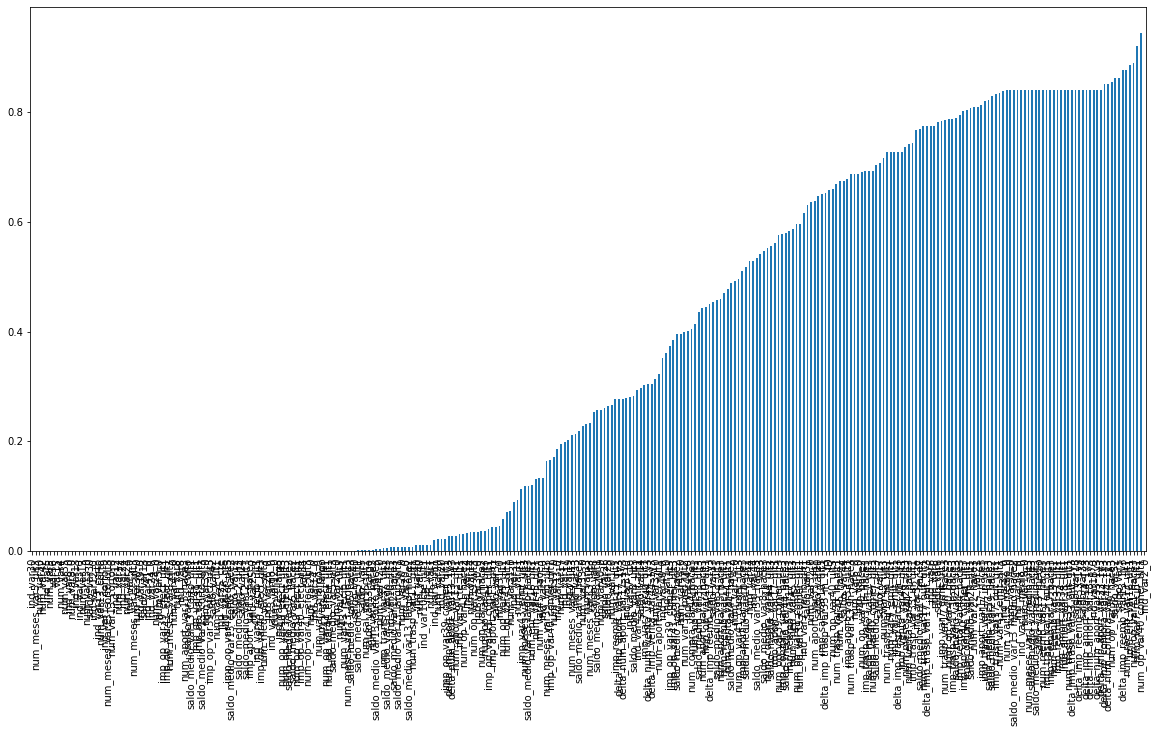

In [47]:
p_values.plot.bar(figsize=(20,10))

In [49]:
p_values=p_values[p_values<0.5]

In [50]:
p_values.index

Index(['ind_var30', 'num_meses_var5_ult3', 'num_var30', 'num_var42',
       'ind_var5', 'num_var5', 'var36', 'var15', 'num_var4', 'num_var35',
       ...
       'imp_op_var40_ult1', 'delta_imp_reemb_var17_1y3', 'saldo_var33',
       'saldo_medio_var33_ult1', 'num_aport_var33_hace3',
       'num_reemb_var17_ult1', 'num_venta_var44_ult1',
       'saldo_medio_var44_hace2', 'num_var14_0', 'num_op_var41_comer_ult3'],
      dtype='object', length=196)

In [51]:
x_train_p=x_train_unique[p_values.index]
x_test_p=x_test_unique[p_values.index]

In [59]:
def rand_f(x_train,x_test,y_train,y_test):
    clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print("Accuracy:",accuracy_score(y_test,y_pred))

In [60]:
rand_f(x_train,x_test,y_train,y_test)

Accuracy: 0.9571603963869157
